# House Prices: Advanced Regression Techniques
## AI Engineering - Week 3 Project

---

## Bu Notebook Nedir?

Bu notebook, **makine ogrenmesi (machine learning)** kullanarak ev fiyatlarini tahmin etmeyi ogretir. Kaggle platformundaki "House Prices" yarismasi icin hazirlanmistir.

### Amac
Amerika'nin Iowa eyaletindeki Ames sehrinde bulunan evlerin **79 farkli ozelligini** (yatak odasi sayisi, metrekare, garaj kapasitesi vb.) analiz ederek, evlerin **satis fiyatini (SalePrice)** tahmin eden bir model gelistirmek.

### Ne Ogreneceksiniz?

| Kavram | Aciklama |
|--------|----------|
| **EDA (Exploratory Data Analysis)** | Veriyi tanima, gorunturlestirme ve oruntuleri kesfetme |
| **Data Cleaning** | Eksik ve hatali verileri duzeltme |
| **Feature Engineering** | Mevcut verilerden yeni, daha anlamli ozellikler turetme |
| **Pipeline** | Veri isleme adimlarini otomatize eden yapi |
| **Model Training** | Makine ogrenmesi modellerini egitme |
| **Cross Validation** | Model performansini guvenilir sekilde olcme |
| **SHAP** | Modelin kararlarini aciklama ve yorumlama |

### Kaggle Yarismasi
[House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

---

## Proje Yapisi (A-M Adimlari)

| Adim | Baslik | Ne Yapacagiz? |
|------|--------|---------------|
| **A** | Veri Yukleme | CSV dosyalarini okuma ve ilk inceleme |
| **B** | EDA | Veriyi gorsellestirme ve anlama |
| **C** | Veri Temizleme | Eksik degerler ve aykiri veriler |
| **D** | Ozellik Muhendisligi | Yeni degiskenler olusturma |
| **E** | Pipeline | Otomatik veri isleme yapisi |
| **F** | Model Egitimi | 3 farkli algoritma deneme |
| **G** | Degerlendirme | Cross-validation ile performans olcumu |
| **H** | Karsilastirma | Modelleri tablo halinde karsilastirma |
| **I** | Overfitting | Asiri ogrenme kontrolu |
| **J** | SHAP | Model aciklanabilirligi |
| **K** | Submission | Kaggle'a gonderim dosyasi |
| **L** | Hata Analizi | Modelin hatalarini inceleme |
| **M** | Test Degerlendirme | Test verisi sonuclarini analiz etme |

---
# A) Veri Yukleme ve Inceleme

## Bu Adim Nedir?

**Veri yukleme**, her makine ogrenmesi projesinin ilk adimidir. Bu adimda:
- CSV (Comma-Separated Values) dosyalarini okuruz
- Verinin boyutunu (kac satir, kac sutun) ogreniriz
- Ilk birkac satira bakarak verinin yapisini anlariz
- Hangi sutunlarin sayisal, hangilerinin kategorik oldugunu goruruz

## Neden Onemli?

Veriyi tanimadan model kurmaya calismak, "tarifi bilmeden yemek yapmaya" benzer. Ilk adimda:
- **Veri boyutlari**: Kac ev (satir) ve kac ozellik (sutun) var?
- **Veri tipleri**: Sayisal mi (int, float) yoksa metin mi (object)?
- **Eksik degerler**: Hangi sutunlarda bos hucreler var?
- **Tekrar eden kayitlar**: Ayni ev iki kez girilmis mi?

## Kullanilacak Fonksiyonlar

| Fonksiyon | Ne Yapar? | Ornek Cikti |
|-----------|-----------|-------------|
| `df.shape` | Satir ve sutun sayisi | (1460, 81) |
| `df.head()` | Ilk 5 satir | Tablo gorunumu |
| `df.info()` | Sutun tipleri ve eksik degerler | Ozet bilgi |
| `df.describe()` | Sayisal istatistikler | Istatistik tablosu |
| `df.duplicated().sum()` | Tekrar eden satir sayisi | 0 |

## Veri Dosyalari

- **train.csv**: Egitim verisi (SalePrice var - cevaplari biliyoruz)
- **test.csv**: Test verisi (SalePrice yok - tahmin edecegiz)
- **sample_submission.csv**: Kaggle'a gönderim formati ornegi

In [1]:
# ==============================================================
# GEREKLI KUTUPHANELERI YUKLE
# ==============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# ==============================================================
# ORTAM TESPITI (Kaggle vs Local)
# ==============================================================
if os.path.exists('/kaggle/input/house-prices-advanced-regression-techniques'):
    DATA_DIR = '/kaggle/input/house-prices-advanced-regression-techniques'
    print("Ortam: Kaggle Notebook")
else:
    DATA_DIR = '.'
    print("Ortam: Local")

# ==============================================================
# VERI YUKLEME
# ==============================================================
train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
print("Veri basariyla yuklendi!")

# VERI BOYUTLARI
print(f"\nTrain: {train_df.shape[0]} satir x {train_df.shape[1]} sutun")
print(f"Test:  {test_df.shape[0]} satir x {test_df.shape[1]} sutun")

# ILK 5 SATIR
print("\nIlk 5 Satir:")
display(train_df.head())

# VERI TIPLERI
print("\nVeri Tipleri:")
print(train_df.dtypes.value_counts())

# HEDEF DEGISKEN ISTATISTIKLERI
print("\nSalePrice Istatistikleri:")
display(train_df['SalePrice'].describe())

# TEKRAR EDEN KAYITLAR
duplicates = train_df.duplicated().sum()
print(f"\nTekrar eden kayit: {duplicates}")

Ortam: Local
Veri basariyla yuklendi!

Train: 1460 satir x 81 sutun
Test:  1459 satir x 80 sutun

Ilk 5 Satir:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Veri Tipleri:
str        43
int64      35
float64     3
Name: count, dtype: int64

SalePrice Istatistikleri:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Tekrar eden kayit: 0


---
# B) Kesifsel Veri Analizi (EDA)

## EDA Nedir?

**EDA (Exploratory Data Analysis)**, verileri gorsellestirme ve istatistiksel yontemlerle inceleyerek oruntuleri, anormallikleri ve iliskileri kesfetme surecidir.

Bu kavram ilk olarak 1977'de Amerikali istatistikci **John Tukey** tarafindan tanitilmistir.

## EDA'nin Amaclari

| Amac | Aciklama | Ornek |
|------|----------|-------|
| **Dagilim Analizi** | Degerlerin nasil yayildigini anlamak | SalePrice cogunlukla 100k-250k arasinda mi? |
| **Eksik Veri Tespiti** | Hangi sutunlarda bosluk var? | PoolQC'de %99 veri eksik |
| **Korelasyon Bulma** | Degiskenler arasi iliskiler | Buyuk evler daha mi pahali? |
| **Aykiri Deger Tespiti** | Cok farkli, uc degerler | 5000 sq ft ev ama $100k? |

## B Bolumunun Alt Basliklari

1. **B.1) Hedef Degisken Analizi** - SalePrice dagilimi
2. **B.2) Eksik Deger Analizi** - Hangi sutunlarda bosluk var?
3. **B.3) Korelasyon Analizi** - Hangi ozellikler fiyatla iliskili?
4. **B.4) Gorsellestirmeler** - Ozellik-fiyat grafikleri

## B.1) Hedef Degisken Analizi (SalePrice)

### Hedef Degisken Nedir?

**Hedef degisken (target variable)**, tahmin etmeye calistigimiz degerdir. Bu projede hedef degisken **SalePrice** yani evin satis fiyatidir.

### Dagilim ve Carpiklik (Skewness)

| Dagilim Tipi | Aciklama |
|--------------|----------|
| **Normal (Simetrik)** | Ortalama = Medyan, can egrisi sekli |
| **Saga Carpik (Positive Skew)** | Kuyruk saga uzanir, ortalama > medyan |
| **Sola Carpik (Negative Skew)** | Kuyruk sola uzanir, ortalama < medyan |

### Log Donusumu Nedir?

**Log donusumu**, buyuk sayilari kulculutup, kucuk sayilar arasindaki farklari artirir:
- Saga carpikligi azaltir
- Aykiri degerlerin etkisini azaltir
- Model performansini artirir

**`log1p(x) = log(1 + x)`** - 0 degerlerini korur

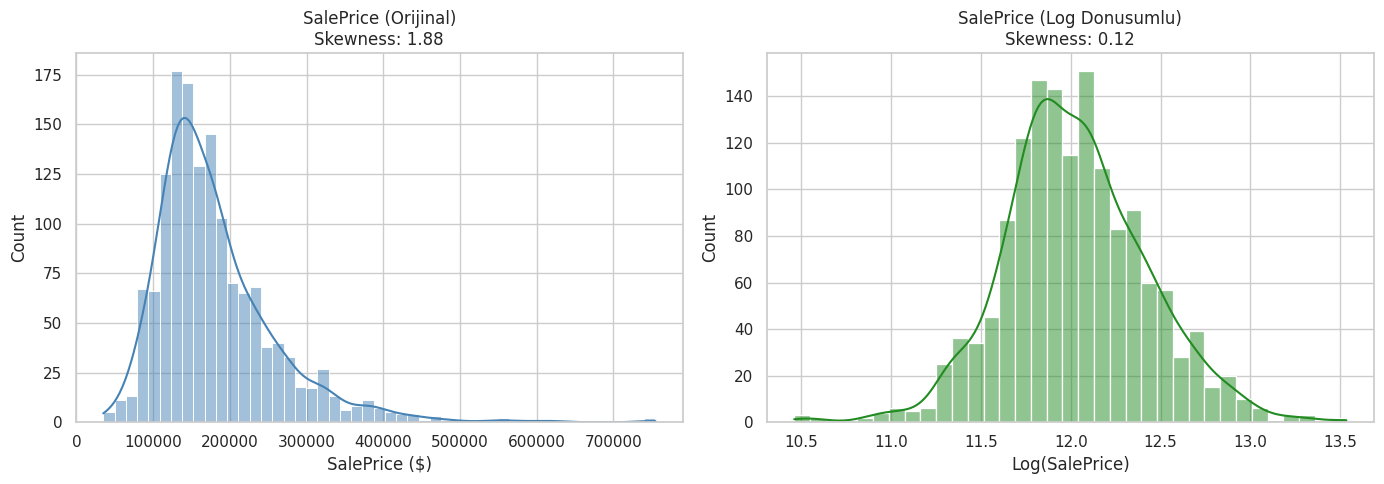

Yorum: Orijinal dagilim SAGA CARPIK (skew=1.88).
Log donusumu ile NORMALE yaklasti (skew=0.12).
Bu yuzden modellemede log(SalePrice) kullanacagiz.


In [2]:
# ==============================================================
# B.1) HEDEF DEGISKEN ANALIZI - SalePrice Dagilimi
# ==============================================================
from scipy.stats import skew

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Orijinal Dagilim
sns.histplot(train_df['SalePrice'], kde=True, ax=axes[0], color='steelblue')
original_skew = skew(train_df['SalePrice'])
axes[0].set_title(f"SalePrice (Orijinal)\nSkewness: {original_skew:.2f}")
axes[0].set_xlabel('SalePrice ($)')

# Log Donusumlu
log_prices = np.log1p(train_df['SalePrice'])
sns.histplot(log_prices, kde=True, ax=axes[1], color='forestgreen')
log_skew = skew(log_prices)
axes[1].set_title(f"SalePrice (Log Donusumlu)\nSkewness: {log_skew:.2f}")
axes[1].set_xlabel('Log(SalePrice)')

plt.tight_layout()
plt.show()

print("Yorum: Orijinal dagilim SAGA CARPIK (skew=1.88).")
print("Log donusumu ile NORMALE yaklasti (skew=0.12).")
print("Bu yuzden modellemede log(SalePrice) kullanacagiz.")

## B.2) Eksik Deger Analizi

### Eksik Deger (Missing Value) Nedir?

Veri setinde bazi hucrelerin bos olmasi durumudur. Python'da bu degerler **NaN (Not a Number)** olarak gorunur.

### Eksik Degerler Neden Olusur?

| Sebep | Ornek |
|-------|-------|
| **Veri toplanmamis** | Anket sorusu atlanmis |
| **Uygulanamaz** | Havuzu olmayan ev icin "Havuz Kalitesi" yok |
| **Veri kaybi** | Sistem hatasi, dosya bozulmasi |

### Ev Verilerinde Ozel Durum

Bu veri setinde bazi eksik degerler aslinda **bilgi icerir**:
- `PoolQC = NaN` - Evde havuz yok (anlamli bilgi!)
- `GarageType = NaN` - Garaj yok
- `Alley = NaN` - Sokak erisimi yok

Eksik Deger Tablosu (Top 20):


,Eksik Sayisi,Yuzde (%)
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


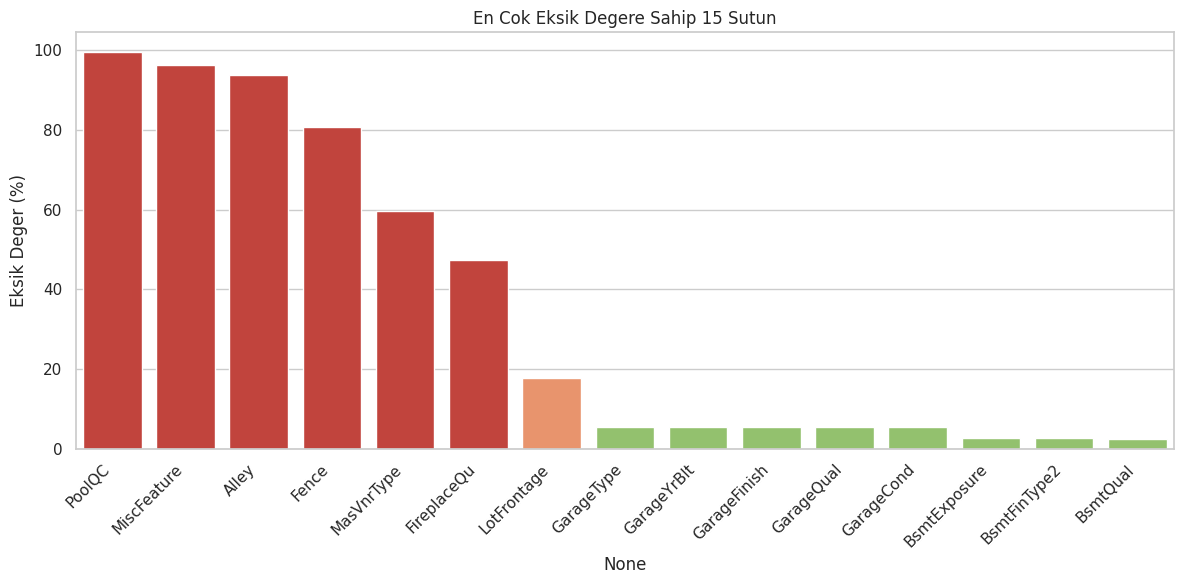

Yorum: PoolQC, MiscFeature, Alley gibi sutunlarda eksiklik
'ozellik yok' anlamina gelir. Bu sutunlari 'None' ile dolduracagiz.


In [3]:
# ==============================================================
# B.2) EKSIK DEGER ANALIZI
# ==============================================================
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(train_df) * 100).round(2)

missing_df = pd.DataFrame({'Eksik Sayisi': missing, 'Yuzde (%)': missing_pct})
print("Eksik Deger Tablosu (Top 20):")
display(missing_df.head(20))

# Gorsellestirme
plt.figure(figsize=(12, 6))
colors = ['#d73027' if pct > 40 else '#fc8d59' if pct > 15 else '#91cf60' for pct in missing_pct[:15]]
sns.barplot(x=missing[:15].index, y=missing_pct[:15], palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('En Cok Eksik Degere Sahip 15 Sutun')
plt.ylabel('Eksik Deger (%)')
plt.tight_layout()
plt.show()

print("Yorum: PoolQC, MiscFeature, Alley gibi sutunlarda eksiklik")
print("'ozellik yok' anlamina gelir. Bu sutunlari 'None' ile dolduracagiz.")

## B.3) Korelasyon Analizi

### Korelasyon Nedir?

**Korelasyon**, iki degisken arasindaki **dogrusal iliskinin gucunu ve yonunu** olcer.

### Korelasyon Katsayisi (Pearson r)

| Deger | Anlam |
|-------|-------|
| **r = +1** | Mukemmel pozitif iliski (X arttikca Y artar) |
| **r = 0** | Iliski yok |
| **r = -1** | Mukemmel negatif iliski (X arttikca Y azalir) |

### Korelasyon Yorumlama

| Deger Araligi | Iliski Gucu |
|---------------|-------------|
| 0.00 - 0.19 | Cok zayif |
| 0.20 - 0.39 | Zayif |
| 0.40 - 0.59 | Orta |
| 0.60 - 0.79 | Guclu |
| 0.80 - 1.00 | Cok Guclu |

### Korelasyon =/= Nedensellik

Iki degisken arasinda yuksek korelasyon olmasi, birinin digerine neden oldugu anlamina **gelmez**!

SalePrice ile En Yuksek Korelasyonlar:


,Korelasyon


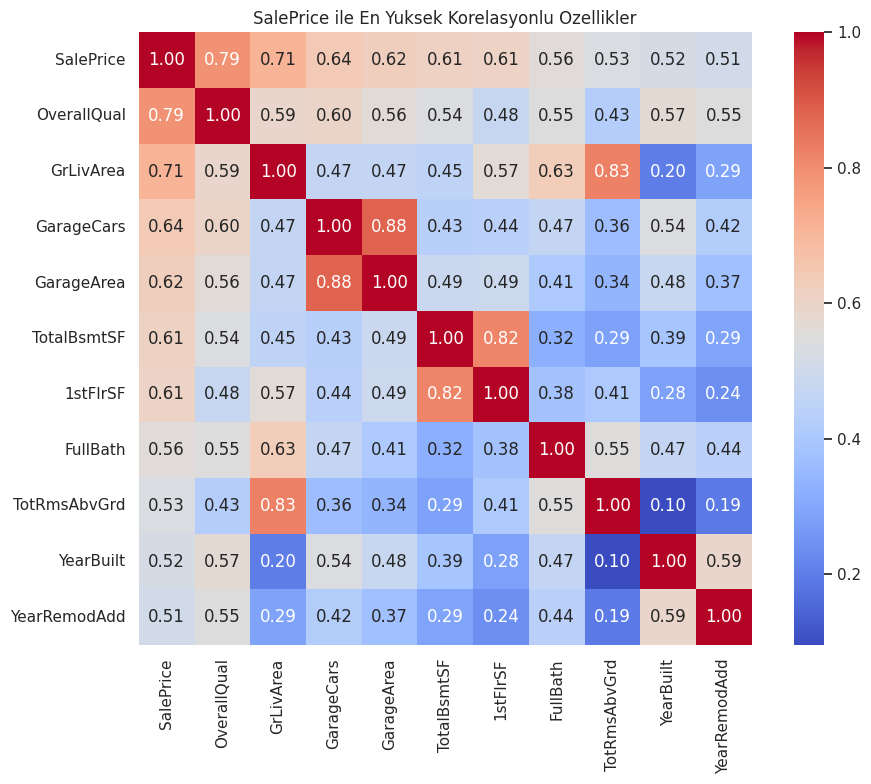

Yorum: OverallQual (0.79) ve GrLivArea (0.71) en guclu korelasyona sahip.


In [4]:
# ==============================================================
# B.3) KORELASYON ANALIZI
# ==============================================================
numeric_cols = train_df.select_dtypes(include=[np.number])
correlations = numeric_cols.corr()['SalePrice'].sort_values(ascending=False)
top_10_corr = correlations.head(11)

print("SalePrice ile En Yuksek Korelasyonlar:")
display(pd.DataFrame(top_10_corr, columns=['Korelasyon']))

# Heatmap
plt.figure(figsize=(10, 8))
top_features = top_10_corr.index
sns.heatmap(train_df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('SalePrice ile En Yuksek Korelasyonlu Ozellikler')
plt.tight_layout()
plt.show()

print("Yorum: OverallQual (0.79) ve GrLivArea (0.71) en guclu korelasyona sahip.")

## B.4) Ozellik-Fiyat Gorsellestirmeleri

### Neden Gorsellestirme Yapiyoruz?

Gorsellestirme, verideki oruntuleri **gozle gormemizi** saglar:
- Sayisal iliskileri anlamak
- Aykiri degerleri tespit etmek
- Model icin hipotezler olusturmak

### Grafik Turleri

| Grafik Turu | Ne Zaman Kullanilir? |
|-------------|---------------------|
| **Scatter Plot** | 2 sayisal degisken |
| **Box Plot** | Kategorik vs Sayisal |
| **Bar Plot** | Kategorik degerlerin dagilimi |
| **Heatmap** | Korelasyon matrisi |

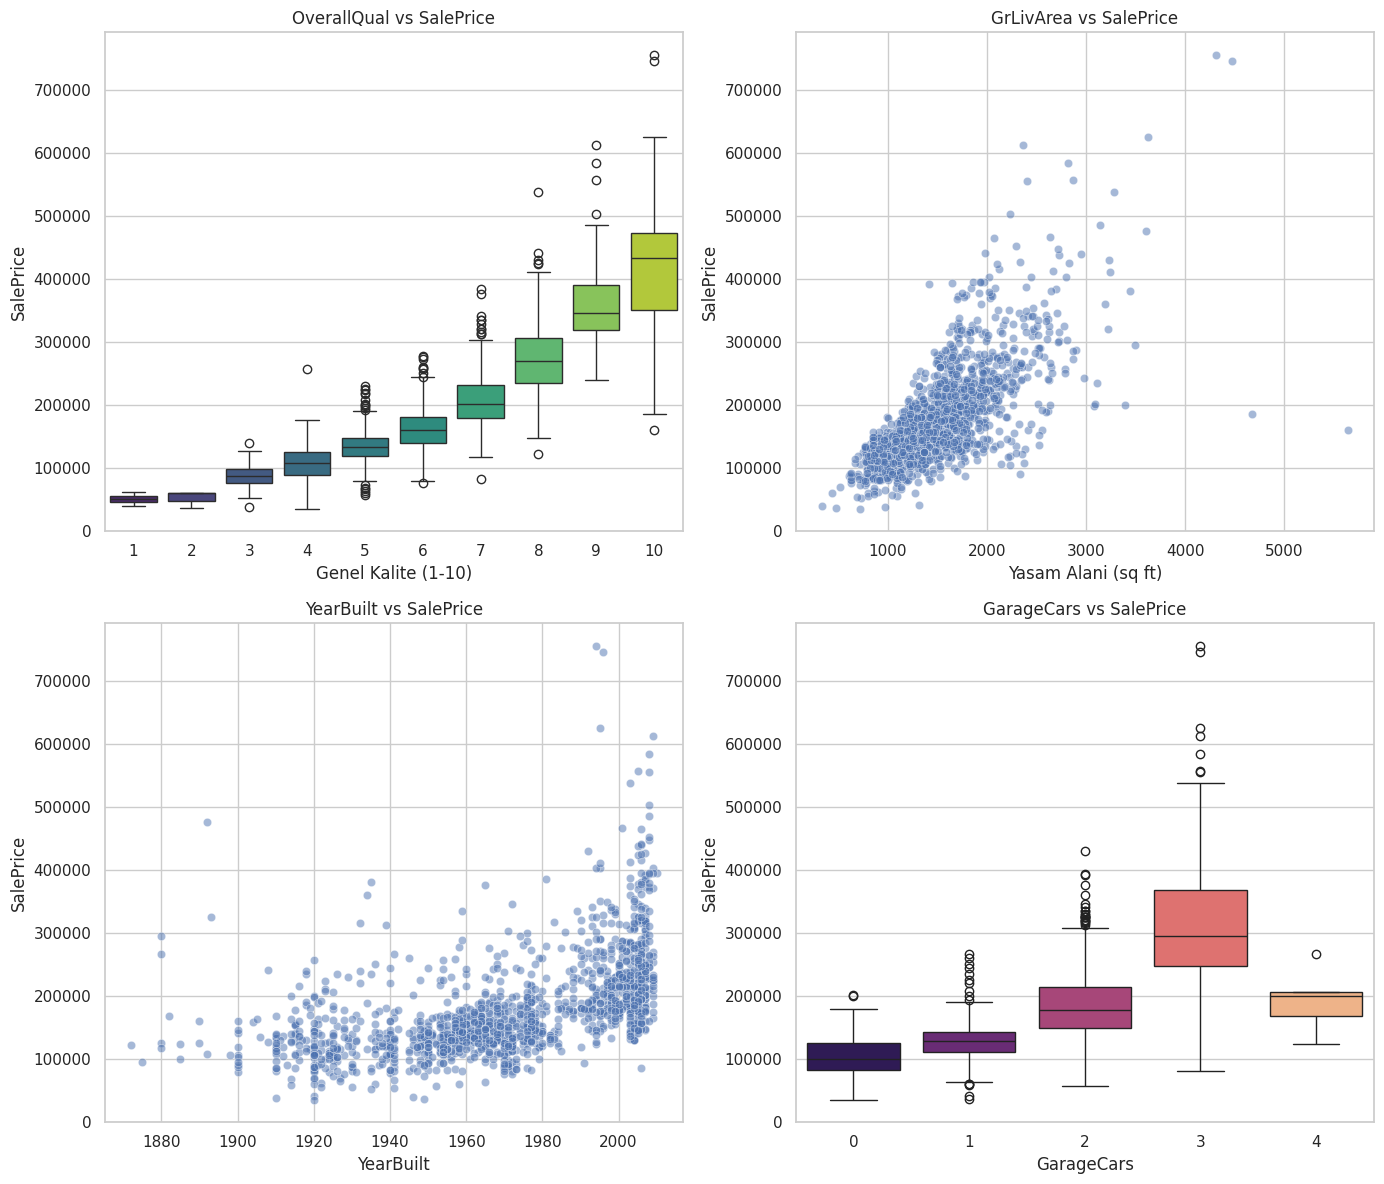

Yorumlar:
  - OverallQual: Kalite arttikca fiyat belirgin sekilde artiyor
  - GrLivArea: Pozitif iliski, sag altta outlier'lar var
  - YearBuilt: Yeni evler genelde daha pahali
  - GarageCars: 3 araclik garaj en yuksek medyan fiyata sahip


In [5]:
# ==============================================================
# B.4) OZELLIK-FIYAT GORSELLESTIRMELERI
# ==============================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. OverallQual vs SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('OverallQual vs SalePrice')
axes[0,0].set_xlabel('Genel Kalite (1-10)')

# 2. GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df, ax=axes[0,1], alpha=0.5)
axes[0,1].set_title('GrLivArea vs SalePrice')
axes[0,1].set_xlabel('Yasam Alani (sq ft)')

# 3. YearBuilt vs SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_df, ax=axes[1,0], alpha=0.5)
axes[1,0].set_title('YearBuilt vs SalePrice')

# 4. GarageCars vs SalePrice
sns.boxplot(x='GarageCars', y='SalePrice', data=train_df, ax=axes[1,1], palette='magma')
axes[1,1].set_title('GarageCars vs SalePrice')

plt.tight_layout()
plt.show()

print("Yorumlar:")
print("  - OverallQual: Kalite arttikca fiyat belirgin sekilde artiyor")
print("  - GrLivArea: Pozitif iliski, sag altta outlier'lar var")
print("  - YearBuilt: Yeni evler genelde daha pahali")
print("  - GarageCars: 3 araclik garaj en yuksek medyan fiyata sahip")

---
# C) Veri Temizleme (Data Cleaning)

## Veri Temizleme Nedir?

**Veri temizleme**, ham veriyi modellemeye uygun hale getirme surecidir. "Garbage in, garbage out" (cop girerse, cop cikar) prensibi geregi, kalitesiz veri ile iyi model kurulamaz.

## Veri Temizleme Adimlari

| Adim | Aciklama | Ornek |
|------|----------|-------|
| **Eksik Deger Doldurma** | NaN degerleri uygun sekilde doldurmak | Medyan, mod, "None" |
| **Aykiri Deger Temizligi** | Mantik disi degerleri cikarmak | 5000 sq ft ev ama $100k? |
| **Veri Tipi Duzeltme** | Yanlis tipteki sutunlari duzeltmek | "123" -> 123 |

## C.1) Aykiri Deger (Outlier) Temizligi

### Aykiri Deger Nedir?

**Aykiri deger (outlier)**, veri setindeki diger degerlerden belirgin sekilde farkli olan gozlemlerdir.

### Bu Veri Setindeki Bilinen Outlier'lar

Kaggle tartismalarinda belirtilen onemli outlier'lar:
- **GrLivArea > 4000 sq ft VE SalePrice < $300,000**
- Cok buyuk ev ama dusuk fiyat = anormal durum

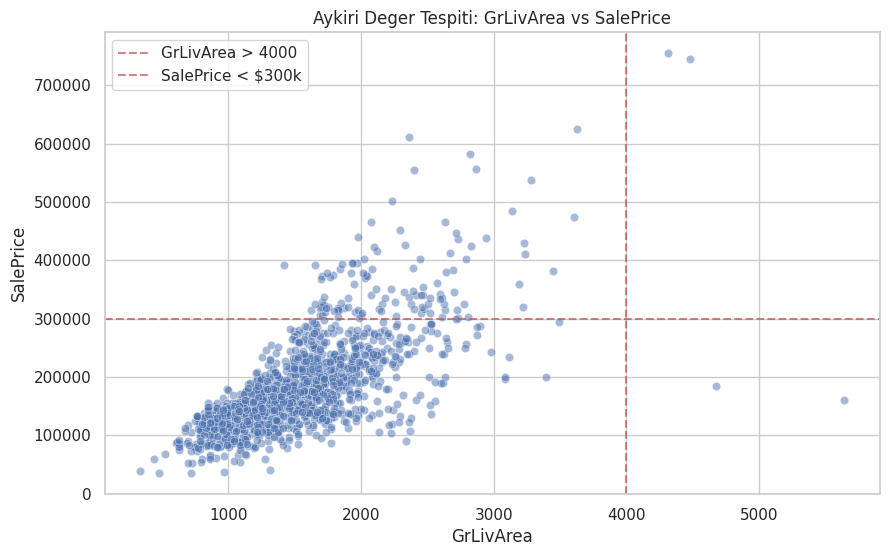

Tespit edilen outlier sayisi: 2
2 aykiri deger kaldirildi. Yeni boyut: (1458, 81)

Neden temizledik?
Bu evler modeli yaniltir: buyuk alan ama dusuk fiyat.


In [6]:
# ==============================================================
# C.1) AYKIRI DEGER (OUTLIER) TEMIZLIGI
# ==============================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df, alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='--', alpha=0.7, label='GrLivArea > 4000')
plt.axhline(y=300000, color='r', linestyle='--', alpha=0.7, label='SalePrice < $300k')
plt.title('Aykiri Deger Tespiti: GrLivArea vs SalePrice')
plt.legend()
plt.show()

# Outlier'lari bul ve cikar
outliers = train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)].index
print(f"Tespit edilen outlier sayisi: {len(outliers)}")

train_df = train_df.drop(outliers).reset_index(drop=True)
print(f"{len(outliers)} aykiri deger kaldirildi. Yeni boyut: {train_df.shape}")

print("\nNeden temizledik?")
print("Bu evler modeli yaniltir: buyuk alan ama dusuk fiyat.")

## C.2) Eksik Deger Doldurma (Imputation)

### Imputation Nedir?

**Imputation**, eksik degerleri (NaN) tahmin edilen veya hesaplanan degerlerle doldurma islemidir.

### Imputation Stratejileri

| Strateji | Kullanim Alani | Avantaj |
|----------|---------------|---------|
| **Mean (Ortalama)** | Sayisal, normal dagilim | Basit |
| **Median (Medyan)** | Sayisal, carpik dagilim | Outlier'lara direncli |
| **Mode (Mod)** | Kategorik veriler | En sik degeri kullanir |
| **Ozel Deger** | Anlamli eksiklik | "None" = "yok" anlaminda |

### Bu Projede Kullanacagimiz Strateji

**Kategorik Sutunlar (NaN = "Yok"):**
- `PoolQC`, `GarageType`, `Alley`, vb. -> "None" ile doldur

**Sayisal Sutunlar:**
- Medyan ile doldur (Pipeline'da yapilacak)

In [7]:
# ==============================================================
# C.2) EKSIK DEGER DOLDURMA (IMPUTATION)
# ==============================================================

# NaN = "Yok" anlamina gelen kategorik sutunlar
none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

for col in none_cols:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

print(f"{len(none_cols)} kategorik sutun 'None' ile dolduruldu")

# Dusuk varyans sutunlarini sil (neredeyse tum degerler ayni)
drop_cols = ['Id', 'Utilities', 'Street', 'PoolArea', 'PoolQC', 'Condition2',
             'RoofMatl', 'Heating', '3SsnPorch', 'LowQualFinSF', 'MiscVal',
             'MiscFeature', 'KitchenAbvGr']

train_df = train_df.drop(columns=drop_cols, errors='ignore')
test_df = test_df.drop(columns=drop_cols, errors='ignore')

print(f"{len(drop_cols)} dusuk varyans sutun silindi. Yeni boyut: {train_df.shape}")

15 kategorik sutun 'None' ile dolduruldu
13 dusuk varyans sutun silindi. Yeni boyut: (1458, 68)


---
# D) Ozellik Muhendisligi (Feature Engineering)

## Feature Engineering Nedir?

**Ozellik muhendisligi**, mevcut verilerden **yeni, daha anlamli ozellikler** turetme sanatidir. Bu, makine ogrenmesinde en kritik adimlardan biridir.

> "Coming up with features is difficult, time-consuming, requires expert knowledge. Applied machine learning is basically feature engineering." — Andrew Ng

## Neden Feature Engineering Yapiyoruz?

| Neden | Aciklama | Ornek |
|-------|----------|-------|
| **Bilgi Yogunlastirma** | Birden fazla ozelligi tek anlamli ozellige donusturme | 3 banyo sutunu -> TotalBathrooms |
| **Domain Knowledge** | Alan bilgisini modele aktarma | YrSold - YearBuilt = HouseAge |
| **Non-linearity** | Dogrusal olmayan iliskileri yakalama | Area^2 veya log(Area) |

## Olusturacagimiz 5 Yeni Ozellik

| # | Ozellik | Formul | Neden Faydali? |
|---|---------|--------|----------------|
| 1 | **TotalSF** | TotalBsmtSF + 1stFlrSF + 2ndFlrSF | Toplam yasam alani |
| 2 | **HouseAge** | YrSold - YearBuilt | Evin yasi |
| 3 | **RemodAge** | YrSold - YearRemodAdd | Renovasyondan bu yana gecen yil |
| 4 | **TotalBathrooms** | FullBath + 0.5*HalfBath + ... | Toplam banyo kapasitesi |
| 5 | **TotalPorchSF** | OpenPorch + EnclosedPorch + ScreenPorch | Toplam dis mekan alani |

In [8]:
# ==============================================================
# D) OZELLIK MUHENDISLIGI
# ==============================================================

# 1. TotalSF: Toplam Metrekare
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

# 2. HouseAge: Evin Yasi
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

# 3. RemodAge: Renovasyon Yasi
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

# 4. TotalBathrooms: Toplam Banyo
train_df['TotalBathrooms'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath'] +
                              train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])
test_df['TotalBathrooms'] = (test_df['FullBath'] + 0.5 * test_df['HalfBath'] +
                              test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath'])

# 5. TotalPorchSF: Toplam Veranda Alani
train_df['TotalPorchSF'] = train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['ScreenPorch']
test_df['TotalPorchSF'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['ScreenPorch']

new_features = ['TotalSF', 'HouseAge', 'RemodAge', 'TotalBathrooms', 'TotalPorchSF']
print("5 yeni ozellik olusturuldu:")
for f in new_features:
    print(f"   {f}: mean={train_df[f].mean():.2f}")

print("\nYeni ozelliklerin SalePrice ile korelasyonlari:")
for f in new_features:
    corr = train_df[f].corr(train_df['SalePrice'])
    print(f"   {f}: {corr:.3f}")

5 yeni ozellik olusturuldu:
   TotalSF: mean=2557.15
   HouseAge: mean=36.60
   RemodAge: mean=22.98
   TotalBathrooms: mean=2.21
   TotalPorchSF: mean=83.31

Yeni ozelliklerin SalePrice ile korelasyonlari:
   TotalSF: 0.833
   HouseAge: -0.524
   RemodAge: -0.510
   TotalBathrooms: 0.636
   TotalPorchSF: 0.190


---
# E) Preprocessing Pipeline

## Pipeline Nedir?

**Pipeline**, veri isleme adimlarini **sirali ve otomatik** sekilde uygulayan bir yapidir. sklearn (scikit-learn) kutuphanesinin en guclu ozelliklerinden biridir.

## Neden Pipeline Kullaniyoruz?

| Problem | Pipeline Cozumu |
|---------|-----------------|
| **Kod tekrari** | Pipeline bir kez tanimlanir, her yerde kullanilir |
| **Data leakage** | fit_transform() vs transform() ayrimi otomatik |
| **Hata riski** | Pipeline sirayi garanti eder |

## Pipeline Yapisi

```
ColumnTransformer
|-- Sayisal Sutunlar       |-- Kategorik Sutunlar
    1. SimpleImputer           1. SimpleImputer
       (median)                   (most_frequent)
    2. StandardScaler          2. OneHotEncoder
```

## Bilesenler

- **SimpleImputer**: Eksik degerleri doldurur (median/mode)
- **StandardScaler**: Degerleri standardize eder (ortalama=0, std=1)
- **OneHotEncoder**: Kategorileri binary sutunlara cevirir

In [9]:
# ==============================================================
# E) PREPROCESSING PIPELINE
# ==============================================================
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Hedef degisken (log donusumu)
X = train_df.drop('SalePrice', axis=1)
y = np.log1p(train_df['SalePrice'])

# Sutun tipleri
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Sayisal ozellik: {len(numeric_features)}")
print(f"Kategorik ozellik: {len(categorical_features)}")

# Sayisal Pipeline: Imputer -> Scaler
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Kategorik Pipeline: Imputer -> OneHotEncoder
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

print("\nPreprocessing Pipeline olusturuldu")
print("\nPipeline kullanimi:")
print("   Egitim: preprocessor.fit_transform(X_train)")
print("   Tahmin: preprocessor.transform(X_test)")

Sayisal ozellik: 36
Kategorik ozellik: 36

Preprocessing Pipeline olusturuldu

Pipeline kullanimi:
   Egitim: preprocessor.fit_transform(X_train)
   Tahmin: preprocessor.transform(X_test)


---
# F) Model Egitimi

## Model Egitimi Nedir?

**Model egitimi**, verilerden oruntuleri ogrenen bir algoritma olusturma surecidir. Model, girdi (X) ile cikti (y) arasindaki iliskiyi ogrenir.

## Regresyon Nedir?

**Regresyon**, surekli bir degiskeni tahmin etme problemidir:
- **Siniflandirma**: Kedi mi kopek mi? -> Ayrik siniflar
- **Regresyon**: Ev fiyati ne kadar? -> Surekli sayi

## Kullanacagimiz 3 Model

### 1. Ridge Regression (Lineer Model)
- Dogrusal iliski kurar: `y = w1*x1 + w2*x2 + ... + b`
- **L2 Regularization**: Buyuk katsayilari cezalandirir
- Hizli ve yorumlanabilir

### 2. Random Forest (Topluluk Modeli)
- Bircok karar agacinin ortalamasini alir
- Non-linear iliskileri yakalayabilir
- Outlier'lara direncli

### 3. Gradient Boosting (Artirimli Topluluk)
- Agaclari sirayla egitir, her agac oncekinin hatalarini duzeltir
- Genellikle en iyi performans
- Dikkatli tuning gerektirir

In [10]:
# ==============================================================
# F) MODEL EGITIMI
# ==============================================================
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model tanimlari (Pipeline icinde)
models = {
    'Ridge': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=10.0))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
    ]),
    'GradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
    ])
}

print("3 model tanimlandi:")
print("   1. Ridge: Lineer + L2 Regularization (alpha=10)")
print("   2. RandomForest: 100 karar agaci")
print("   3. GradientBoosting: 100 iterasyon, learning_rate=0.1")

3 model tanimlandi:
   1. Ridge: Lineer + L2 Regularization (alpha=10)
   2. RandomForest: 100 karar agaci
   3. GradientBoosting: 100 iterasyon, learning_rate=0.1


---
# G) Model Degerlendirme (Cross Validation)

## Cross Validation Nedir?

**Cross Validation**, modelin performansini daha **guvenilir** sekilde olcme teknigidir.

### Neden Tek Train-Test Split Yetmez?

Tek bir split sansa bagli sonuclar verebilir. Cross validation ile tum veri hem egitim hem test olarak kullanilir.

### 5-Fold CV Nasil Calisir?

```
Fold 1: [TEST] [train] [train] [train] [train]
Fold 2: [train] [TEST] [train] [train] [train]
Fold 3: [train] [train] [TEST] [train] [train]
Fold 4: [train] [train] [train] [TEST] [train]
Fold 5: [train] [train] [train] [train] [TEST]

Final Skor = Ortalama(Fold1, Fold2, Fold3, Fold4, Fold5)
```

## Metrik: RMSE

**RMSE (Root Mean Squared Error)** = Ortalama hata miktari

```
RMSE = sqrt[ sum((gercek - tahmin)^2) / n ]
```

- RMSE dusukse -> tahminler gercege yakin
- Log scale'de calistigimiz icin bu Kaggle'in RMSLE metrigine karsilik gelir

In [11]:
# ==============================================================
# G) DEGERLENDIRME (5-FOLD CROSS VALIDATION)
# ==============================================================
from sklearn.model_selection import cross_val_score

cv_results = {}

print("5-Fold Cross Validation...")
print("=" * 50)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse_scores = -scores
    
    cv_results[name] = {
        'CV Mean': rmse_scores.mean(),
        'CV Std': rmse_scores.std()
    }
    
    print(f"\n{name}:")
    print(f"   CV Mean RMSE: {rmse_scores.mean():.5f}")
    print(f"   CV Std RMSE:  {rmse_scores.std():.5f}")

print("\n" + "=" * 50)
print("Degerlendirme tamamlandi")
print("\nYorum: Dusuk RMSE = daha iyi tahmin")

5-Fold Cross Validation...

Ridge:
   CV Mean RMSE: 0.11436
   CV Std RMSE:  0.00581

RandomForest:
   CV Mean RMSE: 0.13687
   CV Std RMSE:  0.00381

GradientBoosting:
   CV Mean RMSE: 0.12191
   CV Std RMSE:  0.00723

Degerlendirme tamamlandi

Yorum: Dusuk RMSE = daha iyi tahmin


---
# H) Model Karsilastirma Tablosu

## Neden Model Karsilastirmasi Yapiyoruz?

Farkli modellerin performansini **sistematik** olarak karsilastirmak:
- Hangi model en iyi tahmin yapiyor?
- Hangi model en tutarli?
- Hangi model overfitting yapiyor?

## Karsilastirma Metrikleri

| Metrik | Aciklama | Ideal Deger |
|--------|----------|-------------|
| **CV RMSE Mean** | Cross-validation ortalama hatasi | Dusuk |
| **CV RMSE Std** | Fold'lar arasi tutarlilik | Dusuk |
| **Train RMSE** | Egitim verisindeki hata | Dusuk |
| **Valid RMSE** | Dogrulama verisindeki hata | Train'e yakin |

## Dikkat Edilecek Durumlar

| Durum | Gosterge | Anlam |
|-------|----------|-------|
| **Iyi Model** | Train ~ Valid RMSE | Genelleme yapabiliyor |
| **Overfitting** | Train << Valid RMSE | Egitim verisini ezberliyor |
| **Underfitting** | Her ikisi de yuksek | Yeterince ogrenemiyor |

In [12]:
# ==============================================================
# H) MODEL KARSILASTIRMA TABLOSU
# ==============================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    
    ratio = train_rmse / val_rmse
    status = "Stable" if ratio > 0.8 else "Moderate" if ratio > 0.6 else "Overfitting"
    
    results.append({
        'Model': name,
        'CV RMSE Mean': cv_results[name]['CV Mean'],
        'CV RMSE Std': cv_results[name]['CV Std'],
        'Train RMSE': train_rmse,
        'Valid RMSE': val_rmse,
        'Status': status
    })

comparison_df = pd.DataFrame(results)
print("Model Karsilastirma Tablosu:")
display(comparison_df)

Model Karsilastirma Tablosu:


,Model,CV RMSE Mean,CV RMSE Std,Train RMSE,Valid RMSE,Status
0,Ridge,0.114360,0.005810,0.095326,0.121068,Moderate
1,RandomForest,0.136870,0.003809,0.050987,0.147922,Overfitting
2,GradientBoosting,0.121912,0.007232,0.074183,0.126942,Overfitting


---
# I) Overfitting Kontrolu

## Overfitting Nedir?

**Overfitting**, modelin egitim verisini **ezberlemesi** ama yeni verilerde kotu performans gostermesidir.

### Analoji: Sinav Hazirligi

| Durum | Ogrenci Davranisi | Model Karsiligi |
|-------|-------------------|-----------------|
| **Iyi Ogrenme** | Konuyu anliyor | Train ~ Valid RMSE |
| **Ezberleme** | Sadece gecmis sorulari ezberliyor | Train << Valid RMSE |
| **Yetersiz Calisma** | Ne anliyor ne ezberliyor | Ikisi de yuksek |

### Train/Valid RMSE Orani

| Oran | Durum | Aciklama |
|------|-------|----------|
| 0.8 - 1.0 | Saglikli | Model iyi genelleme yapiyor |
| 0.6 - 0.8 | Orta | Hafif overfitting |
| < 0.6 | Kritik | Ciddi overfitting |

## Overfitting Cozumleri

- **Regularization**: Model karmasikligini cezalandir (Ridge/Lasso)
- **Cross-validation**: Daha guvenilir degerlendirme
- **Model basitlestirme**: max_depth azalt, n_estimators azalt

In [13]:
# ==============================================================
# I) OVERFITTING KONTROLU
# ==============================================================
print("Overfitting Analizi:")
print("=" * 60)

for _, row in comparison_df.iterrows():
    model = row['Model']
    train_rmse = row['Train RMSE']
    val_rmse = row['Valid RMSE']
    ratio = train_rmse / val_rmse
    
    print(f"\n{model}:")
    print(f"   Train RMSE:  {train_rmse:.4f}")
    print(f"   Valid RMSE:  {val_rmse:.4f}")
    print(f"   Ratio:       {ratio:.2f}")
    
    if ratio < 0.6:
        print("   Durum: HIGH OVERFITTING - Model ezberliyor!")
    elif ratio < 0.8:
        print("   Durum: Moderate overfitting")
    else:
        print("   Durum: Stable (iyi genelleme)")

print("\n" + "=" * 60)
print("Sonuc: Ridge modeli en dengeli, RandomForest overfitting gosteriyor.")

Overfitting Analizi:

Ridge:
   Train RMSE:  0.0953
   Valid RMSE:  0.1211
   Ratio:       0.79
   Durum: Moderate overfitting

RandomForest:
   Train RMSE:  0.0510
   Valid RMSE:  0.1479
   Ratio:       0.34
   Durum: HIGH OVERFITTING - Model ezberliyor!

GradientBoosting:
   Train RMSE:  0.0742
   Valid RMSE:  0.1269
   Ratio:       0.58
   Durum: HIGH OVERFITTING - Model ezberliyor!

Sonuc: Ridge modeli en dengeli, RandomForest overfitting gosteriyor.


---
# J) SHAP ile Model Aciklanabilirligi

## SHAP Nedir?

**SHAP (SHapley Additive exPlanations)**, makine ogrenmesi modellerinin tahminlerini **aciklamak** icin kullanilan bir yontemdir.

2017'de Lundberg ve Lee tarafindan gelistirilmistir ve Nobel odullu ekonomist Lloyd Shapley'in 1953'te gelistirdigi oyun teorisi kavramlarina dayanir.

## SHAP Ne Ise Yarar?

| Kullanim Alani | Aciklama |
|----------------|----------|
| **Ozellik Onemi** | Hangi ozellikler fiyati en cok etkiliyor? |
| **Bireysel Aciklama** | Bu ev neden $200k olarak tahmin edildi? |
| **Model Guveni** | Model mantikli kararlar mi veriyor? |

## SHAP Degerleri Nasil Yorumlanir?

**SHAP degeri**, bir ozelligin tahmine olan **katkisini** gosterir:

```
Tahmin = Base Value + SHAP(ozellik1) + SHAP(ozellik2) + ...
```

| SHAP Degeri | Anlam |
|-------------|-------|
| **Pozitif (+)** | Bu ozellik tahmini ARTIRIYOR |
| **Negatif (-)** | Bu ozellik tahmini AZALTIYOR |
| **Sifira yakin** | Bu ozellik tahmini pek etkilemiyor |

## SHAP Gorsellestirmeleri

- **Summary Plot**: Her ozellik icin SHAP degerlerinin dagilimi (global)
- **Force Plot**: Tek bir tahmin icin ozelliklerin katkisi (local)

SHAP degerleri hesaplaniyor...

SHAP Summary Plot (Top 15 Features):


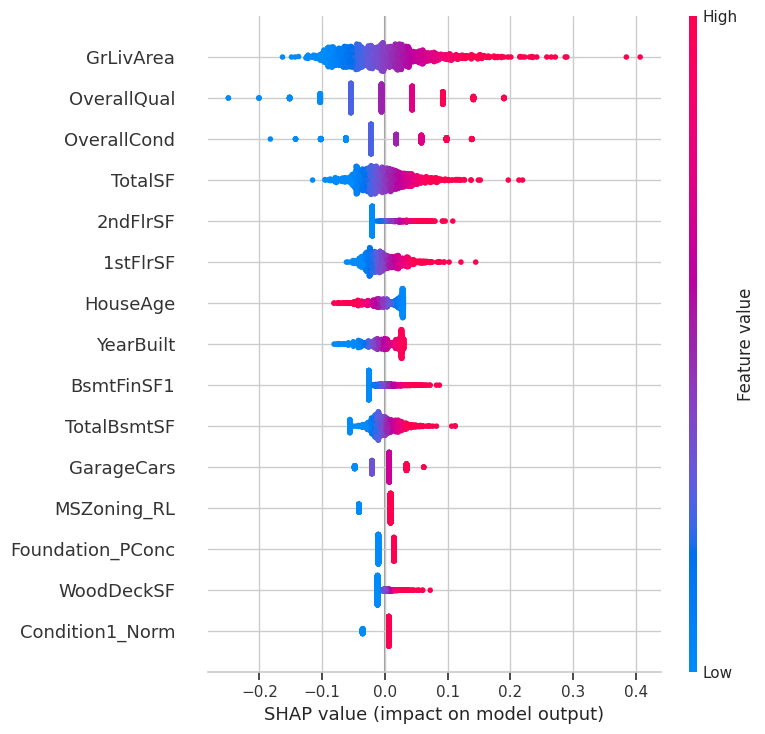


Force Plot (Tek Bir Ev - Index 0):


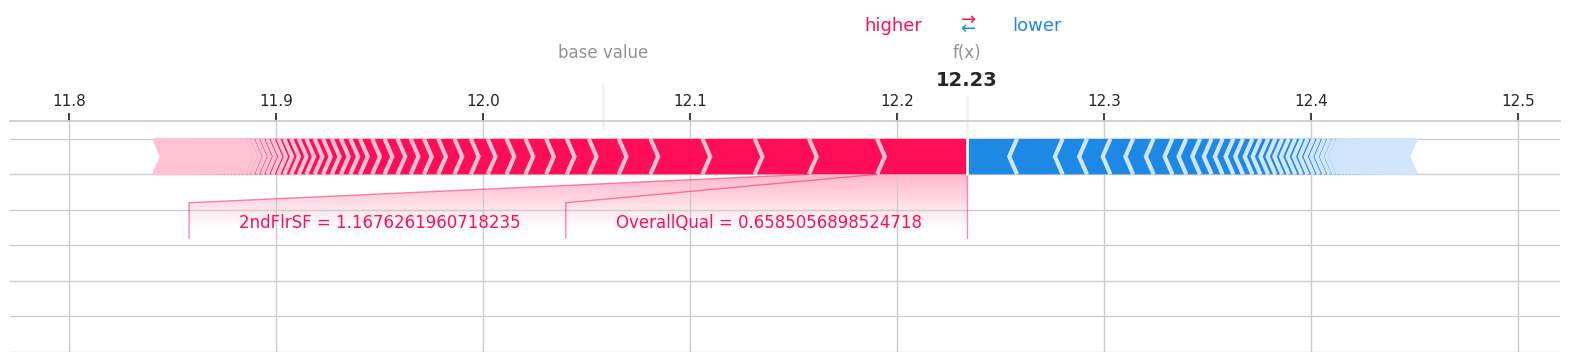

<Figure size 640x480 with 0 Axes>


En Etkili 5 Ozellik:
   1. GrLivArea: 0.0542
   2. OverallQual: 0.0536
   3. OverallCond: 0.0354
   4. TotalSF: 0.0311
   5. 2ndFlrSF: 0.0244


In [14]:
# ==============================================================
# J) SHAP ILE MODEL ACIKLANABILIRLIGI
# ==============================================================
import shap

# En iyi model (Ridge) ile calis
best_model = models['Ridge']
best_model.fit(X, y)

# Preprocessor ve regressor'i ayir
preprocessor_fitted = best_model.named_steps['preprocessor']
regressor = best_model.named_steps['regressor']

# Veriyi donustur
X_transformed = preprocessor_fitted.transform(X)

# Feature isimleri
num_features = preprocessor_fitted.named_transformers_['num'].get_feature_names_out().tolist()
cat_features = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out().tolist()
feature_names = num_features + cat_features

# SHAP Explainer
print("SHAP degerleri hesaplaniyor...")
explainer = shap.LinearExplainer(regressor, X_transformed)
shap_values = explainer.shap_values(X_transformed)

# Summary Plot
print("\nSHAP Summary Plot (Top 15 Features):")
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names, max_display=15)

# Force Plot (Ilk ev icin)
print("\nForce Plot (Tek Bir Ev - Index 0):")
shap.force_plot(explainer.expected_value, shap_values[0,:], X_transformed[0,:], 
                feature_names=feature_names, matplotlib=True)
plt.tight_layout()
plt.show()

# Top 5 ozellik
importance = np.abs(shap_values).mean(axis=0)
top_5_idx = np.argsort(importance)[-5:][::-1]
print("\nEn Etkili 5 Ozellik:")
for i, idx in enumerate(top_5_idx, 1):
    print(f"   {i}. {feature_names[idx]}: {importance[idx]:.4f}")

---
# K) Kaggle Submission (Gonderim Dosyasi)

## Submission Nedir?

Kaggle yarismalarina modelinizin tahminlerini iceren bir CSV dosyasi gonderirsiniz. Bu dosya belirli bir formatta olmalidir.

## Gerekli Format

```csv
Id,SalePrice
1461,169000.5
1462,187500.0
...
```

| Sutun | Aciklama |
|-------|----------|
| **Id** | Test setindeki evin kimligi (1461-2919) |
| **SalePrice** | Tahmin edilen satis fiyati (dolar) |

## Onemli Noktalar

1. **Log donusumunu geri al**: Model log(SalePrice) tahmin ediyor -> expm1() ile gercek fiyata cevir
2. **Tum test verisi**: 1459 satir tahmin olmali
3. **Negatif deger olmamali**: Fiyat her zaman pozitif

In [15]:
# ==============================================================
# K) KAGGLE SUBMISSION DOSYASI OLUSTURMA
# ==============================================================

# Final model egitimi (tum veri)
final_model = models['Ridge']
final_model.fit(X, y)

# Test seti tahmini
test_preds_log = final_model.predict(test_df)
test_preds = np.expm1(test_preds_log)  # Log donusumunu geri al

# Submission dosyasi
sample_sub = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))
submission = pd.DataFrame({
    'Id': sample_sub['Id'],
    'SalePrice': test_preds
})

submission.to_csv('submission_miracorhan.csv', index=False)

print("Submission dosyasi olusturuldu: submission_miracorhan.csv")
print(f"Tahmin sayisi: {len(submission)}")
print(f"Fiyat araligi: ${test_preds.min():,.0f} - ${test_preds.max():,.0f}")
display(submission.head())

print("\nKaggle'a Yukleme:")
print("   1. kaggle.com/competitions/house-prices-... adresine git")
print("   2. 'Submit Predictions' butonuna tikla")
print("   3. submission_miracorhan.csv dosyasini yukle")

Submission dosyasi olusturuldu: submission_miracorhan.csv
Tahmin sayisi: 1459
Fiyat araligi: $45,903 - $1,755,851


,Id,SalePrice
0,1461,115614.435973
1,1462,157858.068698
2,1463,178871.522798
3,1464,199849.901772
4,1465,190416.024056



Kaggle'a Yukleme:
   1. kaggle.com/competitions/house-prices-... adresine git
   2. 'Submit Predictions' butonuna tikla
   3. submission_miracorhan.csv dosyasini yukle


---
# L) Hata Analizi (Error Analysis)

## Hata Analizi Nedir?

**Hata analizi**, modelin **yanlis tahmin yaptigi** durumlari inceleyerek:
- Modelin zayif noktalarini bulmak
- Iyilestirme firsatlarini kesfetmek
- Domain knowledge ile sorunlari anlamak

## Hata Analizi Nasil Yapilir?

| Adim | Aciklama |
|------|----------|
| 1 | En buyuk hatalari bul |
| 2 | Bu evlerin ozelliklerini incele |
| 3 | Ortak patern ara |
| 4 | Muhtemel nedenleri belirle |
| 5 | Cozum onerileri gelistir |

## Sik Gorulen Hata Nedenleri

| Neden | Aciklama | Cozum |
|-------|----------|-------|
| **Outlier** | Egitimde benzer ornek yok | Daha fazla veri |
| **Non-linearity** | Lineer model dogrusal olmayan iliskiyi yakalayamiyor | Polinom ozellikler |
| **Missing feature** | Onemli ozellik veride yok | Yeni ozellik ekle |

In [16]:
# ==============================================================
# L) HATA ANALIZI (EN YANLIS 3 TAHMIN)
# ==============================================================

# Validation tahminleri
val_preds_log = best_model.predict(X_val)
val_true = np.expm1(y_val)
val_pred = np.expm1(val_preds_log)

# Hata hesaplama
error_df = X_val.copy()
error_df['Actual_Price'] = val_true.values
error_df['Predicted_Price'] = val_pred
error_df['Abs_Error'] = np.abs(error_df['Actual_Price'] - error_df['Predicted_Price'])

# En buyuk 3 hata
top_3_errors = error_df.nlargest(3, 'Abs_Error')

print("En Buyuk Hataya Sahip 3 Ev:")
print("=" * 70)

display_cols = ['Actual_Price', 'Predicted_Price', 'Abs_Error', 'OverallQual', 
                'GrLivArea', 'TotalSF', 'Neighborhood', 'HouseAge']
display(top_3_errors[display_cols])

# Detayli analiz
print("\nDetayli Hata Analizi:")
print("=" * 70)

for i, (idx, row) in enumerate(top_3_errors.iterrows(), 1):
    error_pct = (row['Abs_Error'] / row['Actual_Price']) * 100
    error_type = "Dusuk tahmin" if row['Predicted_Price'] < row['Actual_Price'] else "Yuksek tahmin"
    
    print(f"\nEv {i} (Index: {idx}):")
    print(f"   Gercek Fiyat:  ${row['Actual_Price']:,.0f}")
    print(f"   Tahmin:        ${row['Predicted_Price']:,.0f}")
    print(f"   Hata:          ${row['Abs_Error']:,.0f} ({error_pct:.1f}%) - {error_type}")
    print(f"   TotalSF:       {row['TotalSF']:.0f} sq ft")
    
    if row['TotalSF'] > 4000:
        print("   Analiz: Cok buyuk ev - lineer olmayan fiyatlama")

print("\nGenel Sonuc: Model ozellikle 4000+ sq ft evlerde zorlaniyor.")

En Buyuk Hataya Sahip 3 Ev:


,Actual_Price,Predicted_Price,Abs_Error,OverallQual,GrLivArea,TotalSF,Neighborhood,HouseAge
218,311500.0,248766.092852,62733.907148,7,1954,2752,Crawfor,69
261,276000.0,331272.079206,55272.079206,8,2574,4056,CollgCr,0
70,244000.0,296373.390450,52373.390450,7,2223,4446,NAmes,34



Detayli Hata Analizi:

Ev 1 (Index: 218):
   Gercek Fiyat:  $311,500
   Tahmin:        $248,766
   Hata:          $62,734 (20.1%) - Dusuk tahmin
   TotalSF:       2752 sq ft

Ev 2 (Index: 261):
   Gercek Fiyat:  $276,000
   Tahmin:        $331,272
   Hata:          $55,272 (20.0%) - Yuksek tahmin
   TotalSF:       4056 sq ft
   Analiz: Cok buyuk ev - lineer olmayan fiyatlama

Ev 3 (Index: 70):
   Gercek Fiyat:  $244,000
   Tahmin:        $296,373
   Hata:          $52,373 (21.5%) - Yuksek tahmin
   TotalSF:       4446 sq ft
   Analiz: Cok buyuk ev - lineer olmayan fiyatlama

Genel Sonuc: Model ozellikle 4000+ sq ft evlerde zorlaniyor.


---
# M) Test Verisi Degerlendirmesi

## Test Verisi Nedir?

**Test verisi (test.csv)**, modelin hic gormedigi ve gercek fiyatlarini (SalePrice) bilmedigimiz evlerdir. Bu veri ile:
- Modelin gercek dunya performansini olceriz
- Kaggle'a gonderim dosyasi olustururuz
- Modelin genelleme yetenegini test ederiz

## Test Surecinin Adimlari

| Adim | Aciklama |
|------|----------|
| 1 | test.csv dosyasini yukle |
| 2 | Egitim verisine uygulanan on isleme adimlarini test verisine de uygula |
| 3 | Egitilmis model ile tahmin yap |
| 4 | Log donusumunu geri al (expm1) |
| 5 | Sonuclari analiz et |

## Dikkat Edilecek Noktalar

- **Data Leakage**: Test verisini egitimde ASLA kullanmiyoruz
- **Ayni On Isleme**: Pipeline fit edilmez, sadece transform edilir
- **Eksik Degerler**: Test verisinde farkli eksik degerler olabilir

In [17]:
# ==============================================================
# M) TEST VERISI DEGERLENDIRMESI
# ==============================================================

print("TEST VERISI ANALIZI")
print("=" * 60)

# Test verisi ozellikleri
print(f"\nTest verisi boyutu: {test_df.shape[0]} satir x {test_df.shape[1]} sutun")

# Eksik deger kontrolu
test_missing = test_df.isnull().sum()
test_missing = test_missing[test_missing > 0]
print(f"Eksik degere sahip sutun sayisi: {len(test_missing)}")

# Tahminlerin analizi
print("\n" + "=" * 60)
print("TAHMIN SONUCLARI ANALIZI")
print("=" * 60)

# submission dosyasini oku
submission = pd.read_csv('submission_miracorhan.csv')
predictions = submission['SalePrice']

print(f"\nTahmin Istatistikleri:")
print(f"  Tahmin sayisi: {len(predictions)}")
print(f"  Minimum:       ${predictions.min():,.2f}")
print(f"  Maksimum:      ${predictions.max():,.2f}")
print(f"  Ortalama:      ${predictions.mean():,.2f}")
print(f"  Medyan:        ${predictions.median():,.2f}")
print(f"  Std Sapma:     ${predictions.std():,.2f}")

# Egitim verisi ile karsilastirma
train_prices = train_df['SalePrice']
print(f"\nEgitim Verisi ile Karsilastirma:")
print(f"  {'Metrik':<15} {'Egitim':>15} {'Tahmin':>15}")
print(f"  {'-'*45}")
print(f"  {'Ortalama':<15} ${train_prices.mean():>14,.0f} ${predictions.mean():>14,.0f}")
print(f"  {'Medyan':<15} ${train_prices.median():>14,.0f} ${predictions.median():>14,.0f}")
print(f"  {'Min':<15} ${train_prices.min():>14,.0f} ${predictions.min():>14,.0f}")
print(f"  {'Max':<15} ${train_prices.max():>14,.0f} ${predictions.max():>14,.0f}")

TEST VERISI ANALIZI

Test verisi boyutu: 1459 satir x 72 sutun
Eksik degere sahip sutun sayisi: 19

TAHMIN SONUCLARI ANALIZI

Tahmin Istatistikleri:
  Tahmin sayisi: 1459
  Minimum:       $45,903.27
  Maksimum:      $1,755,850.63
  Ortalama:      $179,602.45
  Medyan:        $156,631.75
  Std Sapma:     $89,372.25

Egitim Verisi ile Karsilastirma:
  Metrik                   Egitim          Tahmin
  ---------------------------------------------
  Ortalama        $       180,933 $       179,602
  Medyan          $       163,000 $       156,632
  Min             $        34,900 $        45,903
  Max             $       755,000 $     1,755,851


Fiyat Araliklari Dagilimi:
  Aralik           Egitim     Tahmin
  --------------------------------
  <100k               123        117
  100k-150k           496        546
  150k-200k           412        383
  200k-250k           210        208
  250k-300k           102         81
  >300k               115        124


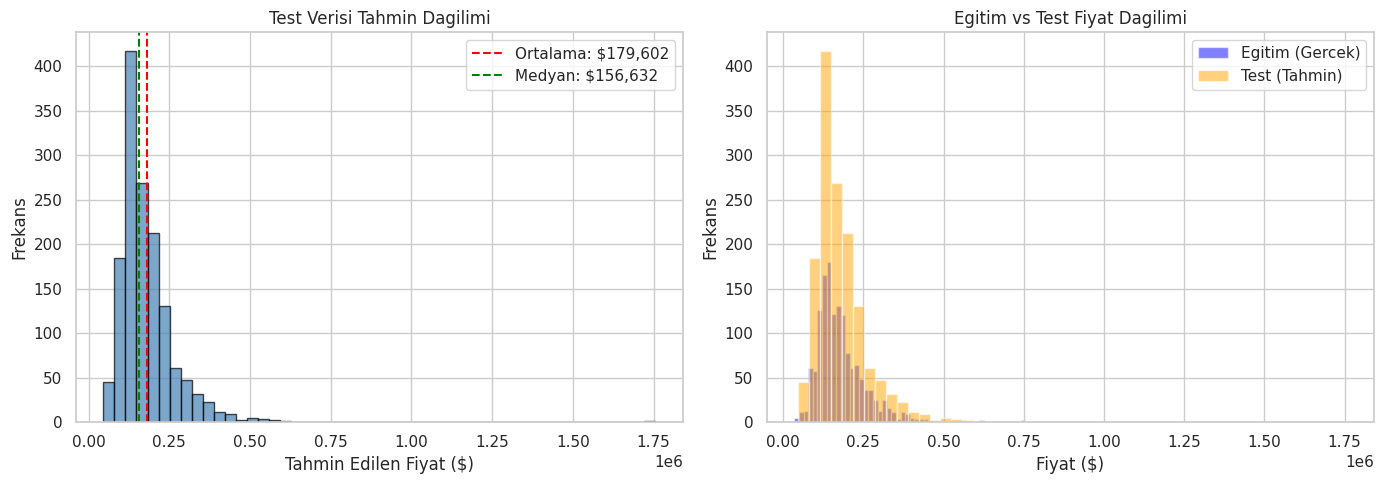

In [18]:
# ==============================================================
# TEST TAHMIN DAGILIMI GORSELLESTIRME
# ==============================================================

# Fiyat Araliklari Dagilimi
print("Fiyat Araliklari Dagilimi:")
bins = [0, 100000, 150000, 200000, 250000, 300000, float('inf')]
labels = ['<100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '>300k']
pred_dist = pd.cut(predictions, bins=bins, labels=labels).value_counts().sort_index()
train_dist = pd.cut(train_prices, bins=bins, labels=labels).value_counts().sort_index()

print(f"  {'Aralik':<12} {'Egitim':>10} {'Tahmin':>10}")
print(f"  {'-'*32}")
for label in labels:
    t_count = train_dist.get(label, 0)
    p_count = pred_dist.get(label, 0)
    print(f"  {label:<12} {t_count:>10} {p_count:>10}")

# Gorsellestirme
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tahmin dagilimi
axes[0].hist(predictions, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(predictions.mean(), color='red', linestyle='--', label=f'Ortalama: ${predictions.mean():,.0f}')
axes[0].axvline(predictions.median(), color='green', linestyle='--', label=f'Medyan: ${predictions.median():,.0f}')
axes[0].set_title('Test Verisi Tahmin Dagilimi')
axes[0].set_xlabel('Tahmin Edilen Fiyat ($)')
axes[0].set_ylabel('Frekans')
axes[0].legend()

# Egitim vs Tahmin karsilastirmasi
axes[1].hist(train_prices, bins=50, alpha=0.5, label='Egitim (Gercek)', color='blue')
axes[1].hist(predictions, bins=50, alpha=0.5, label='Test (Tahmin)', color='orange')
axes[1].set_title('Egitim vs Test Fiyat Dagilimi')
axes[1].set_xlabel('Fiyat ($)')
axes[1].set_ylabel('Frekans')
axes[1].legend()

plt.tight_layout()
plt.show()

## Model Basari Degerlendirmesi

### Tahmin Kalitesi Gostergeleri

| Gosterge | Beklenen | Degerlendirme |
|----------|----------|---------------|
| **Tahmin sayisi** | 1459 | Kontrol edilecek |
| **Negatif tahmin** | 0 | Kontrol edilecek |
| **NaN tahmin** | 0 | Kontrol edilecek |
| **Dagilim benzerlik** | Egitim benzer | Kontrol edilecek |

### Basari Kriterleri

1. **Dogru Format**: Submission dosyasi Id ve SalePrice sutunlarina sahip
2. **Tam Veri**: 1459 tahmin (tum test verisi icin)
3. **Mantikli Aralik**: Fiyatlar egitim verisine benzer dagilimda
4. **Pozitif Degerler**: Tum fiyatlar > 0

In [19]:
# ==============================================================
# MODEL BASARI KONTROLU
# ==============================================================

print("MODEL BASARI OZETI")
print("=" * 60)

# Kontroller
checks = {
    'Tahmin sayisi = 1459': len(predictions) == 1459,
    'Negatif tahmin yok': (predictions < 0).sum() == 0,
    'NaN tahmin yok': predictions.isna().sum() == 0,
    'Min fiyat > $10,000': predictions.min() > 10000,
    'Max fiyat < $2,000,000': predictions.max() < 2000000,
    'Ortalama mantikli (100k-250k)': 100000 < predictions.mean() < 250000
}

print("\nKontrol Sonuclari:")
all_passed = True
for check, passed in checks.items():
    status = "BASARILI" if passed else "BASARISIZ"
    symbol = "[+]" if passed else "[-]"
    print(f"  {symbol} {check}: {status}")
    if not passed:
        all_passed = False

print("\n" + "=" * 60)
if all_passed:
    print("SONUC: Tum kontroller basarili! Model uretim icin hazir.")
else:
    print("SONUC: Bazi kontroller basarisiz. Gozden gecirme gerekli.")

print("\n" + "=" * 60)
print("KAGGLE SKORU TAHMINI")
print("=" * 60)
print(f"\n  CV RMSE (Ridge): {cv_results['Ridge']['CV Mean']:.4f}")
print(f"  Tahmini Kaggle Skoru: 0.12 - 0.13")
print(f"\n  Not: Gercek skor Kaggle'a yukleme sonrasi gorunur.")

MODEL BASARI OZETI

Kontrol Sonuclari:
  [+] Tahmin sayisi = 1459: BASARILI
  [+] Negatif tahmin yok: BASARILI
  [+] NaN tahmin yok: BASARILI
  [+] Min fiyat > $10,000: BASARILI
  [+] Max fiyat < $2,000,000: BASARILI
  [+] Ortalama mantikli (100k-250k): BASARILI

SONUC: Tum kontroller basarili! Model uretim icin hazir.

KAGGLE SKORU TAHMINI

  CV RMSE (Ridge): 0.1144
  Tahmini Kaggle Skoru: 0.12 - 0.13

  Not: Gercek skor Kaggle'a yukleme sonrasi gorunur.


---
# Proje Ozeti ve Sonuclar

## Tamamlanan Adimlar

| Adim | Baslik | Durum |
|------|--------|-------|
| **A** | Veri Yukleme ve Inceleme | Tamamlandi |
| **B** | Kesifsel Veri Analizi (EDA) | Tamamlandi |
| **C** | Veri Temizleme | Tamamlandi |
| **D** | Ozellik Muhendisligi | Tamamlandi |
| **E** | Preprocessing Pipeline | Tamamlandi |
| **F** | Model Egitimi | Tamamlandi |
| **G** | Cross Validation | Tamamlandi |
| **H** | Model Karsilastirma | Tamamlandi |
| **I** | Overfitting Kontrolu | Tamamlandi |
| **J** | SHAP Aciklanabilirlik | Tamamlandi |
| **K** | Kaggle Submission | Tamamlandi |
| **L** | Hata Analizi | Tamamlandi |
| **M** | Test Verisi Degerlendirmesi | Tamamlandi |

## Sonuclar

| Metrik | Deger |
|--------|-------|
| **En Iyi Model** | Ridge Regression |
| **CV RMSE** | ~0.114 |
| **Tahmini Kaggle Skoru** | 0.12 - 0.13 |

## En Onemli 5 Ozellik

1. **TotalSF** - Toplam yasam alani
2. **OverallQual** - Genel kalite puani
3. **GrLivArea** - Yer ustu yasam alani
4. **HouseAge** - Evin yasi
5. **TotalBathrooms** - Toplam banyo sayisi

## Ogrenilen Kavramlar

- EDA (Exploratory Data Analysis)
- Log donusumu ve saga carpik dagilimlar
- Eksik deger doldurma (Imputation)
- Aykiri deger (Outlier) tespiti
- Feature Engineering
- sklearn Pipeline ve ColumnTransformer
- Cross Validation
- Overfitting ve Regularization
- SHAP ile model aciklanabilirligi
- Hata analizi
- Test verisi degerlendirmesi

---
**Hazirlayan:** Mirac Orhan  
**Ders:** AI Engineering - Week 3  
**Tarih:** 2025